In [47]:
import pandas as pd
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
from sklearn import feature_selection as fs
from sklearn import metrics, cross_validation
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math

# Required Python Packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


%matplotlib inline

eviction = pd.read_csv('train_values for pyhton.csv')
test = pd.read_csv('Test for Python.csv')

In [48]:
eviction.head()

,row_id,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,rent_burden,pct_white,pct_af_am,...,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,evictions
0,0,45009,6944,37.218,643,33315.0,98494.0,33.389,0.412070,0.493459,...,0.532,0.252,0.153,0.233000,0.375000,0.278000,0.114000,12.915129,11.205112,2.833147
1,1,9872,1224,31.773,517,43724.0,85444.0,26.477,0.838682,0.015588,...,0.509,0.252,0.188,0.073293,0.397590,0.331325,0.197791,11.049159,12.276843,0.000000
2,2,17625,1725,21.973,671,37777.0,136162.0,32.500,0.873733,0.041040,...,0.451,0.166,0.189,0.206587,0.303393,0.301397,0.188623,7.903576,10.161741,1.462398
3,3,134136,18180,36.809,603,30607.0,70062.0,31.959,0.264083,0.240836,...,0.519,0.263,0.125,0.248255,0.334995,0.290130,0.126620,13.137119,10.202072,2.924796
4,4,6936,551,17.627,668,44237.0,187066.0,29.339,0.924502,0.005146,...,0.487,0.196,0.203,0.058648,0.276342,0.413519,0.251491,6.084752,5.939877,0.301030


In [49]:
test.head()

,row_id,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,rent_burden,pct_white,pct_af_am,...,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,Log EV
0,0,171046,17342,25.310,672,42828,99353,34.738,0.768640,0.136740,...,0.509,0.239,0.149,0.112450,0.346386,0.357430,0.183735,12.238462,9.983245,2.622214
1,1,114518,13776,29.492,657,53712,149404,25.108,0.859299,0.014054,...,0.497,0.234,0.154,0.089357,0.366466,0.311245,0.232932,10.213609,8.902167,2.372912
2,2,4452,317,13.208,506,48642,140740,25.072,0.976854,0.002000,...,0.481,0.161,0.247,0.088176,0.395792,0.345691,0.170341,4.697987,10.514541,0.301030
3,3,16883,1703,29.757,786,40827,139862,30.767,0.883453,0.000000,...,0.501,0.236,0.200,0.130261,0.379760,0.330661,0.159319,11.168180,12.601529,1.361728
4,4,71393,7974,30.864,650,44688,103120,27.092,0.732230,0.028232,...,0.526,0.246,0.150,0.129611,0.354935,0.334995,0.180459,12.941045,11.066342,2.336460


In [50]:
eviction.describe()

,row_id,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,rent_burden,pct_white,pct_af_am,...,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,evictions
count,2546.000000,2.546000e+03,2546.000000,2546.00000,2546.000000,2544.000000,2544.000000,2546.000000,2546.000000,2546.000000,...,2546.000000,2546.000000,2546.000000,2546.000000,2546.000000,2546.000000,2546.000000,2546.000000,2546.000000,2546.000000
mean,1272.500000,1.062459e+05,15008.009034,28.14739,688.838178,46050.601415,129609.579009,28.520561,0.776272,0.089774,...,0.499126,0.226179,0.171583,0.147891,0.353198,0.300911,0.198000,11.481923,10.407134,1.467948
std,735.111216,3.228520e+05,53333.684235,7.94014,183.722492,11584.627249,76236.606321,4.453165,0.201149,0.145550,...,0.024247,0.032725,0.041928,0.068077,0.070167,0.051811,0.086415,2.565979,2.720135,1.033100
min,0.000000,1.160000e+02,14.000000,7.30500,336.000000,19328.000000,32287.000000,9.986000,0.050935,0.000000,...,0.285000,0.088000,0.063000,0.016032,0.127127,0.137000,0.018868,3.612183,0.000000,0.000000
25%,636.250000,1.029350e+04,1052.000000,22.88400,577.250000,38495.500000,85288.250000,26.047250,0.655224,0.005669,...,0.495000,0.206000,0.144000,0.097000,0.308732,0.265734,0.138146,9.915292,8.558383,0.602060
50%,1272.500000,2.386300e+04,2580.500000,26.86600,642.000000,44480.000000,108844.000000,28.780000,0.855478,0.021864,...,0.504000,0.225000,0.168000,0.130869,0.356574,0.301301,0.176677,11.306037,10.478088,1.462398
75%,1908.750000,6.796875e+04,8098.750000,32.09275,750.000000,51526.000000,151696.250000,31.160500,0.935331,0.094011,...,0.511000,0.243750,0.194750,0.194410,0.401405,0.336000,0.232908,12.836254,12.159568,2.206149
max,2545.000000,5.279852e+06,882101.000000,70.61000,1728.000000,123452.000000,904937.000000,49.535000,0.995114,0.858997,...,0.572000,0.359000,0.345000,0.465932,0.550349,0.448692,0.584080,28.922868,27.397260,4.466141


In [51]:
null_counts = eviction.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

homicides_per_100k                        1598
pct_excessive_drinking                     810
pct_adult_smoking                          408
motor_vehicle_crash_deaths_per_100k        308
pop_per_dentist                            190
pop_per_primary_care_physician             175
pct_low_birthweight                        126
median_property_value                        2
median_household_income                      2
air_pollution_particulate_matter_value       1
dtype: int64

In [52]:
eviction.fillna(eviction.mean(), inplace=True)

In [53]:
null_counts = eviction.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [54]:
eviction.dtypes

row_id                                          int64
population                                      int64
renter_occupied_households                      int64
pct_renter_occupied                           float64
median_gross_rent                               int64
median_household_income                       float64
median_property_value                         float64
rent_burden                                   float64
pct_white                                     float64
pct_af_am                                     float64
pct_hispanic                                  float64
pct_am_ind                                    float64
pct_asian                                     float64
pct_nh_pi                                     float64
pct_multiple                                  float64
pct_other                                     float64
poverty_rate                                  float64
rucc                                           object
urban_influence             

In [55]:
def count_unique(eviction, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(eviction[col].value_counts())

cat_cols = ['urban_influence', 'rucc', 'economic_typology']
count_unique(eviction, cat_cols)


For column urban_influence
Small-in a metro area with fewer than 1 million residents                                             550
Large-in a metro area with at least 1 million residents or more                                       358
Noncore adjacent to a small metro with town of at least 2,500 residents                               270
Micropolitan adjacent to a small metro area                                                           201
Micropolitan not adjacent to a metro area                                                             197
Noncore adjacent to micro area and contains a town of 2,500-19,999 residents                          174
Noncore not adjacent to a metro/micro area and does not contain a town of at least 2,500 residents    162
Noncore adjacent to micro area and does not contain a town of at least 2,500 residents                158
Noncore adjacent to a small metro and does not contain a town of at least 2,500 residents             146
Noncore adjacent t

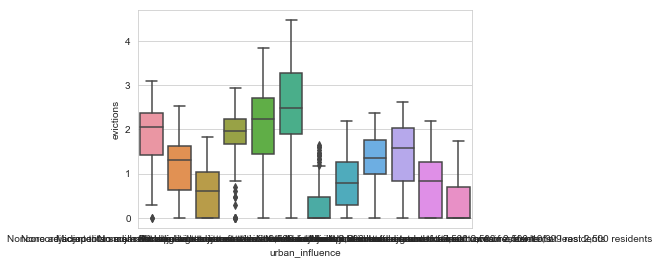

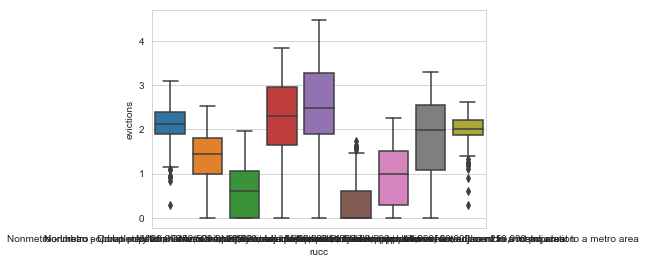

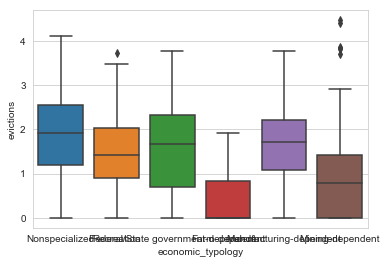

In [56]:
 def plot_box(eviction, cols, col_y = 'evictions'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data=eviction)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
plot_box(eviction, cat_cols) 

C:\Users\McConnell Group\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


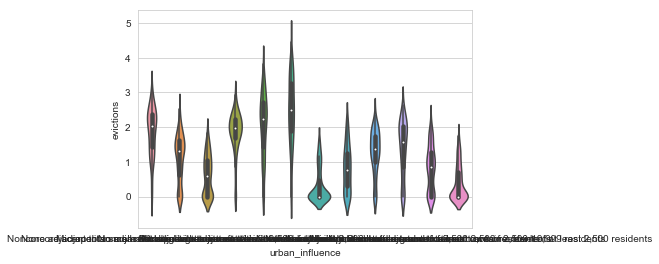

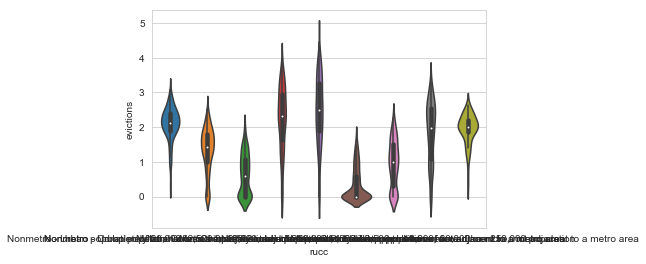

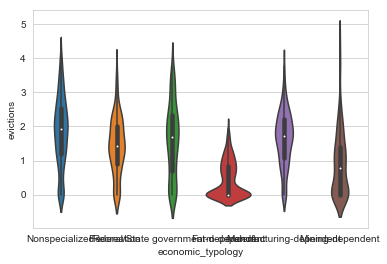

In [57]:
def plot_violin(eviction, cols, col_y = 'evictions'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col, col_y, data=eviction)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
plot_violin(eviction, cat_cols)

C:\Users\McConnell Group\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


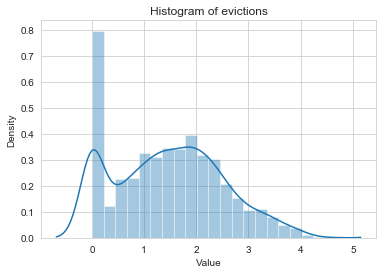

In [58]:
def hist_plot(vals, lab):
    ## Distribution plot of values
    sns.distplot(vals)
    plt.title('Histogram of ' + lab)
    plt.xlabel('Value')
    plt.ylabel('Density')
    
#labels = np.array
hist_plot(eviction['evictions'], 'evictions')

IndexError: list index out of range

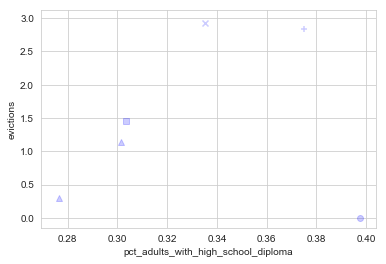

In [63]:
def plot_scatter_shape(eviction, cols, shape_col = 'pct_renter_occupied', col_y = 'evictions', alpha = 0.2):
    shapes = ['+', 'o', 's', 'x', '^'] # pick distinctive shapes
    unique_cats = eviction[shape_col].unique()
    for col in cols: # loop over the columns to plot
        sns.set_style("whitegrid")
        for i, cat in enumerate(unique_cats): # loop over the unique categories
            temp = eviction[eviction[shape_col] == cat]
            sns.regplot(col, col_y, data=temp, marker = shapes[i], label = cat,
                        scatter_kws={"alpha":alpha}, fit_reg = False, color = 'blue')
        plt.title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.legend()
        plt.show()
            
num_cols = ['pct_adults_with_high_school_diploma', 'pct_adults_with_some_college', 'pct_adults_bachelors_or_higher', 'birth_rate_per_1k', 'death_rate_per_1k']
plot_scatter_shape(eviction, num_cols) 

In [64]:
print(eviction['urban_influence'].unique())
Features = eviction['urban_influence']
enc = preprocessing.LabelEncoder()
enc.fit(Features)
Features = enc.transform(Features)
print(Features)

['Micropolitan adjacent to a large metro area'
 'Noncore adjacent to a small metro with town of at least 2,500 residents'
 'Noncore adjacent to a small metro and does not contain a town of at least 2,500 residents'
 'Micropolitan adjacent to a small metro area'
 'Small-in a metro area with fewer than 1 million residents'
 'Large-in a metro area with at least 1 million residents or more'
 'Noncore not adjacent to a metro/micro area and does not contain a town of at least 2,500 residents'
 'Noncore not adjacent to a metro/micro area and contains a town of 2,500  or more residents'
 'Noncore adjacent to a large metro area'
 'Micropolitan not adjacent to a metro area'
 'Noncore adjacent to micro area and contains a town of 2,500-19,999 residents'
 'Noncore adjacent to micro area and does not contain a town of at least 2,500 residents']
[ 1  6  5 ... 11  2 11]


In [65]:
ohe = preprocessing.OneHotEncoder()
encoded = ohe.fit(Features.reshape(-1,1))
Features = encoded.transform(Features.reshape(-1,1)).toarray()
Features[:10,:]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [66]:
def encode_string(cat_feature):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_feature)
    enc_cat_feature = enc.transform(cat_feature)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_feature.reshape(-1,1))
    return encoded.transform(enc_cat_feature.reshape(-1,1)).toarray()
    

categorical_columns = [ 'rucc', 'economic_typology']

for col in categorical_columns:
    temp = encode_string(eviction[col])
    Features = np.concatenate([Features, temp], axis = 1)

print(Features.shape)
print(Features[:2, :])

(2546, 27)
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 1. 0.]]


In [67]:
Features = np.concatenate([Features, np.array(eviction[['pct_renter_occupied', 'rent_burden', 'pct_uninsured_adults', 'pct_diabetes', 'air_pollution_particulate_matter_value', 'heart_disease_mortality_per_100k']])], axis = 1)
Features[:2,:]

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 3.72180000e+01,
        3.33890000e+01, 2.39000000e-01, 1.45000000e-01, 1.21652874e+01,
        3.18000000e+02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00,

testing below change to boosted tree

In [68]:
nr.seed(3333)
labels = np.array(eviction['evictions'])
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 40)
x_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
x_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])

In [69]:
scaler = preprocessing.StandardScaler().fit(x_train[:,14:])
x_train[:,14:] = scaler.transform(x_train[:,14:])
x_test[:,14:] = scaler.transform(x_test[:,14:])
print(x_train.shape)
x_train[:5,:]

(2506, 33)


array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  2.97110265,
        -0.30006524, -0.41156859, -0.4741613 , -0.38874851, -0.26462354,
        -0.18737518, -0.40491637, -0.35892733, -0.43840382, -0.30399835,
         1.21906157, -0.32768824,  1.41402485,  0.84880275, -0.01219633,
        -0.9659683 ,  1.42874577,  1.05687205],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.33657538,
        -0.30006524, -0.41156859,  2.10898698, -0.38874851, -0.26462354,
        -0.18737518, -0.40491637,  2.78607928, -0.43840382, -0.30399835,
        -0.82030311, -0.32768824,  0.55704095, -0.72750434, -0.91203496,
        -1.2353009 ,  0.13930896, -0.32546425],
       [ 1.        ,  0.    

In [84]:
from sklearn.ensemble import RandomForestRegressor

x_train, y_train = make_regression(n_features=63, n_informative=4,
                       random_state=0, shuffle=True)
rf = RandomForestRegressor(max_depth=16, random_state=3333,
                             n_estimators=100)
rf.fit(x_train, y_train)

print(rf.feature_importances_)

print(rf.predict(test))

[1.97131053e-03 3.44636934e-03 1.94019562e-03 1.81132310e-03
 1.39424017e-03 4.09944178e-03 1.64841852e-03 8.72212045e-03
 3.87485041e-03 2.28913376e-03 1.58602948e-03 2.24868596e-03
 9.49299064e-04 1.22925530e-03 3.04887659e-03 1.55747109e-03
 2.25861448e-03 3.02091014e-03 2.10074674e-03 3.16065534e-01
 1.58913758e-03 1.55171171e-03 5.33242423e-01 2.11436377e-03
 1.79272565e-03 1.37329666e-03 2.12889384e-03 1.19600558e-03
 6.72907415e-03 2.78435723e-03 1.70823762e-03 1.11744604e-03
 2.16806082e-03 5.07193038e-03 5.86249518e-03 3.94316181e-04
 4.05629706e-03 2.80744060e-03 3.75711510e-03 2.41395983e-03
 2.74266527e-03 1.95293181e-03 1.43599488e-03 1.09377168e-03
 2.26805842e-03 1.70048335e-03 1.93272190e-03 5.54185916e-03
 1.15490943e-03 1.03929966e-03 1.71863724e-03 1.17383146e-03
 1.60302449e-03 2.55919164e-03 5.13597316e-03 3.24811322e-03
 2.54889569e-03 1.76540585e-03 1.47295214e-03 3.72984964e-03
 1.70765394e-03 1.20810465e-03 2.14355702e-03]
[ 69.38923364  70.0476085  -15.2664274

In [85]:
print(*rf.predict(test), sep = "\n")

69.38923363717392
70.04760850315205
-15.26642741825233
-16.224089692937984
-12.171731282097646
-15.961357163365822
-11.572711527277038
-19.324922055324297
-14.105519111732107
81.963307240671
-17.46225158620537
-13.507589737213918
-16.804655610695146
-9.083048035199655
82.4910875862045
-14.451444058001668
-17.601633516439673
-14.163370294340618
70.27235105604714
-14.163370294340618
70.39653186501646
-13.44792313622188
-13.423350701561802
-14.282684625298687
-12.879273849264662
-14.592238487411471
70.05774262777524
-16.96517729044233
-14.60540125047806
-13.080415814077508
-12.598489817891066
-15.033408732870337
71.33047448658321
81.711440143921
-18.977364256707137
-9.660511812818871
-14.105519111732107
-15.168217746554198
-10.53965141071623
78.7568030691567
-10.27543996555317
-18.977364256707137
-12.056509738447174
71.5356990747929
78.27593345321921
-9.3814058863057
-15.168217746554198
69.06999574934949
-13.56112255665592
-13.132721666410383
82.34138089570564
-17.982914452074326
-13.9761

-14.67009177092757
79.96085036938935
79.49133504165842
-13.16187592154594
-16.983358781180126
-13.746230150414032
-15.765403363460749
-15.351024418291665
-11.571216326902517
80.19761449921823
-14.537821511981171
80.43918563072353
-12.121528557706668
-15.168217746554198
-18.401384997564406
80.59514554033741
-8.818156810899952
-13.87340033121828
-13.382483614262561
-16.347260808303712
-14.153128638994257
82.81806693228553
-14.477371382623069
-14.746994602129245
81.58444674670476
-12.95091364125036
70.3495606869604
80.11715123352154
-20.072011668474506
81.34881752127995
70.02465327285398
-11.487347246180947
-15.111214174294075
-13.426340760347069
78.23719938637186
-14.327662330477251
-14.190885669211685
-15.067824322957293
-15.896696058395444
80.05657438051823
-14.721827402048795
71.46241889168776
-17.833613003659373
-13.976166790280724
-12.381326417528333
-11.087927611150162
80.73353767551795
-12.453505699495704
-12.702548167889558
-17.690050380288326
-11.63828308435456
-16.0170584673360

-13.339557061479068
-16.077205638717412
-16.83375897707396
-13.423350701561802
-15.223878720304727
-15.367994727986053
-16.240011363442587
71.1996863621156
78.37386328718755
-15.168217746554198
-9.8829227293284
79.49133504165842
-13.985591164585633
-12.525313207373108
80.43918563072353
81.94242467239071
71.1996863621156
82.86215443035906
-15.961357163365822
-18.556339675921578
-10.96778819247111
-13.832457293477649
-8.86975739739883
-19.318089637839083
70.3495606869604
